<a href="https://colab.research.google.com/github/wolf1729/AQI_Prediction/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [15]:
link = "/content/delhi_aqi_day_wise.csv"
data = pd.read_csv(link)

In [16]:
print(data.isnull().sum())
data.dropna(inplace=True)
print(data.isnull().sum())
print(data.describe())

City            0
Date            0
PM2.5           2
PM10           77
NO              2
NO2             2
NOx             0
NH3             9
CO              0
SO2           110
O3             84
Benzene         0
Toluene         0
AQI            10
AQI_Bucket     10
dtype: int64
City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64
             PM2.5         PM10           NO          NO2          NOx  \
count  1881.000000  1881.000000  1881.000000  1881.000000  1881.000000   
mean    121.556858   235.223296    39.500165    51.259532    61.518666   
std      83.439987   121.868136    34.121392    22.176111    36.766584   
min      10.240000    19.510000     3.570000    13.430000     1.870000   
25%      61.040000   139.150000    15.350000    34.530000    34.320000   
50%      98.630000  

In [17]:
# Convert date strings to datetime objects
data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")

# Create a new column 'Season' based on the 'Date' column
data['Season'] = data['Date'].dt.month.map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'})

In [18]:
# Convert datetime to numerical representation (e.g., number of days since a specific date)
data['Date'] = (data['Date'] - pd.to_datetime("2015-01-01")).dt.total_seconds() / (24 * 60 * 60)

In [19]:
#Printing the columns to selects the features for prediction
print(data.columns)

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket', 'Season'],
      dtype='object')


In [20]:
#Selecting the features for the model
features = ['Date','PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3']
x = data[features]

In [21]:
#Selecting the Prediction target
y = data['AQI']

In [22]:
#Splitting the data into training and validation data
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)

In [23]:
model = RandomForestRegressor(max_leaf_nodes=84701, n_estimators=100, random_state=1)
model.fit(train_x, train_y)
predictions = model.predict(val_x)
print(mean_absolute_error(val_y, predictions))
print(mean_squared_error(val_y, predictions))
print(data['AQI'].head(), predictions[:5])

22.314161358811035
980.7460711252654
0    472.0
1    454.0
2    143.0
3    319.0
4    325.0
Name: AQI, dtype: float64 [193.21 152.33 172.   359.49 501.02]


In [24]:
# Initialize leaf count variable
leaf_count = 0

# Iterate through each decision tree in the ensemble
for estimator in model.estimators_:
    tree = estimator.tree_
    leaf_count += tree.n_leaves

print("Number of leaf nodes in the RandomForestRegressor:", leaf_count)

Number of leaf nodes in the RandomForestRegressor: 84700


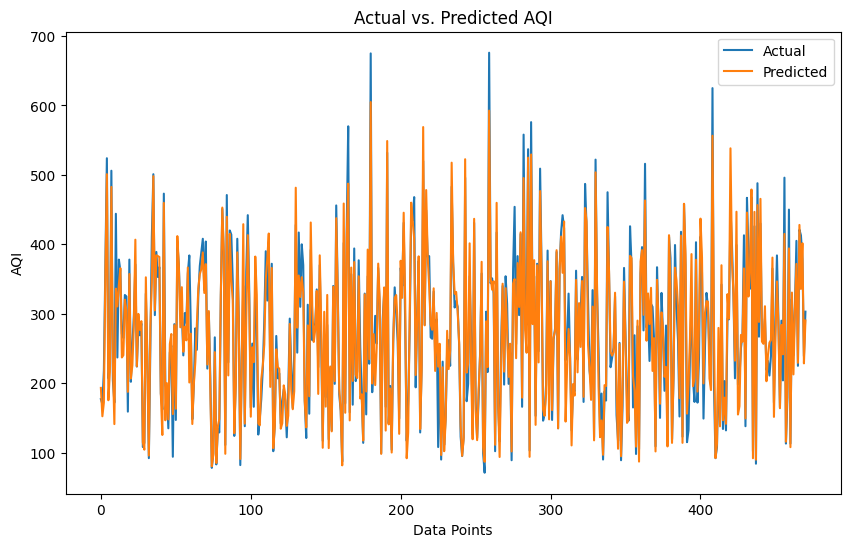

In [25]:
# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(val_y.values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('AQI')
plt.title('Actual vs. Predicted AQI')
plt.legend()
plt.show()